In [2]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [24]:
import matplotlib.pyplot as plt

### Dataset & Dataloader

In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [5]:
bs = 128

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder('data/train/',transform=transform)
trainloader = DataLoader(train_set,batch_size=bs,shuffle=True,)

test_set = datasets.ImageFolder('data/test/',transform=transform)
testloader = DataLoader(test_set,batch_size=bs,shuffle=True ,)

In [6]:
from jcopdl.layers import linear_block

In [7]:
class FashionClassifier(nn.Module):
    def __init__(self, input_size, n1, n2, output_size, dropout=0.2): 
        super().__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            linear_block(input_size,n1, dropout=dropout),
            linear_block(n1,n2,dropout=dropout),
            linear_block(n2,output_size,activation='lsoftmax')
            )
        
    def forward(self,x):
        return self.fc(x)

In [8]:
config = set_config({
    'input_size':784,
    'n1': 256,
    'n2' : 64,
    'output_size': len(train_set.classes),
    'dropout': 0.2
})

### Training Prep >> MCOC

In [9]:
model = FashionClassifier(config.input_size,config.n1,config.n2,config.output_size,config.dropout).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(),lr=0.001)
callback = Callback(model=model,config=config,outdir='model')

### Training

In [10]:
from tqdm.auto import tqdm

def loop_fn(mode,dataset,dataloader,model,criterion,optimizer,device):
    if mode == 'train':
        model.train()
    elif model =='test':
        model.eval()
    cost = correct = 0
    for feature,target in tqdm(dataloader,desc=mode.title()):
        feature,target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output,target)
        
        if mode == 'train':
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()
        
    cost= cost / len(dataset)
    acc = correct / len(dataset)
    return cost, acc

Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     1
Train_cost  = 0.4805 | Test_cost  = 0.4681 | Train_score = 0.8310 | Test_score = 0.8286 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     2
Train_cost  = 0.4228 | Test_cost  = 0.4113 | Train_score = 0.8479 | Test_score = 0.8499 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     3
Train_cost  = 0.3934 | Test_cost  = 0.3989 | Train_score = 0.8598 | Test_score = 0.8541 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     4
Train_cost  = 0.3736 | Test_cost  = 0.3837 | Train_score = 0.8663 | Test_score = 0.8616 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     5
Train_cost  = 0.3567 | Test_cost  = 0.3686 | Train_score = 0.8727 | Test_score = 0.8669 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     6
Train_cost  = 0.3403 | Test_cost  = 0.3749 | Train_score = 0.8782 | Test_score = 0.8640 |
==> EarlyStop patience =  1 | Best test_score: 0.8669


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     7
Train_cost  = 0.3314 | Test_cost  = 0.3677 | Train_score = 0.8812 | Test_score = 0.8673 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     8
Train_cost  = 0.3193 | Test_cost  = 0.3561 | Train_score = 0.8832 | Test_score = 0.8742 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     9
Train_cost  = 0.3107 | Test_cost  = 0.3567 | Train_score = 0.8877 | Test_score = 0.8682 |
==> EarlyStop patience =  1 | Best test_score: 0.8742


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    10
Train_cost  = 0.3024 | Test_cost  = 0.3579 | Train_score = 0.8911 | Test_score = 0.8719 |
==> EarlyStop patience =  2 | Best test_score: 0.8742


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    11
Train_cost  = 0.2983 | Test_cost  = 0.3419 | Train_score = 0.8911 | Test_score = 0.8784 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    12
Train_cost  = 0.2888 | Test_cost  = 0.3454 | Train_score = 0.8928 | Test_score = 0.8782 |
==> EarlyStop patience =  1 | Best test_score: 0.8784


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    13
Train_cost  = 0.2840 | Test_cost  = 0.3433 | Train_score = 0.8959 | Test_score = 0.8779 |
==> EarlyStop patience =  2 | Best test_score: 0.8784


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    14
Train_cost  = 0.2775 | Test_cost  = 0.3493 | Train_score = 0.8971 | Test_score = 0.8749 |
==> EarlyStop patience =  3 | Best test_score: 0.8784


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    15
Train_cost  = 0.2700 | Test_cost  = 0.3448 | Train_score = 0.9012 | Test_score = 0.8802 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    16
Train_cost  = 0.2668 | Test_cost  = 0.3456 | Train_score = 0.9009 | Test_score = 0.8796 |
==> EarlyStop patience =  1 | Best test_score: 0.8802


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    17
Train_cost  = 0.2590 | Test_cost  = 0.3430 | Train_score = 0.9047 | Test_score = 0.8817 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    18
Train_cost  = 0.2528 | Test_cost  = 0.3535 | Train_score = 0.9066 | Test_score = 0.8783 |
==> EarlyStop patience =  1 | Best test_score: 0.8817


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    19
Train_cost  = 0.2524 | Test_cost  = 0.3419 | Train_score = 0.9071 | Test_score = 0.8764 |
==> EarlyStop patience =  2 | Best test_score: 0.8817


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    20
Train_cost  = 0.2455 | Test_cost  = 0.3366 | Train_score = 0.9075 | Test_score = 0.8836 |


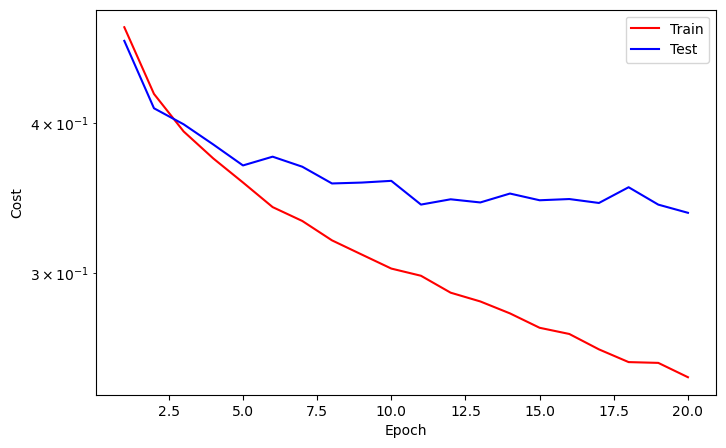

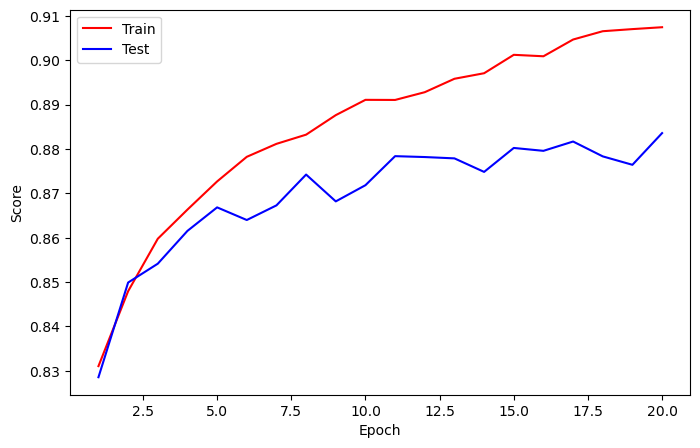

Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    21
Train_cost  = 0.2473 | Test_cost  = 0.3410 | Train_score = 0.9094 | Test_score = 0.8810 |
==> EarlyStop patience =  1 | Best test_score: 0.8836


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    22
Train_cost  = 0.2371 | Test_cost  = 0.3502 | Train_score = 0.9115 | Test_score = 0.8830 |
==> EarlyStop patience =  2 | Best test_score: 0.8836


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    23
Train_cost  = 0.2348 | Test_cost  = 0.3503 | Train_score = 0.9116 | Test_score = 0.8832 |
==> EarlyStop patience =  3 | Best test_score: 0.8836


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    24
Train_cost  = 0.2273 | Test_cost  = 0.3560 | Train_score = 0.9142 | Test_score = 0.8790 |
==> EarlyStop patience =  4 | Best test_score: 0.8836


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    25
Train_cost  = 0.2278 | Test_cost  = 0.3538 | Train_score = 0.9152 | Test_score = 0.8791 |
==> EarlyStop patience =  5 | Best test_score: 0.8836
==> Execute Early Stopping at epoch: 25 | Best test_score: 0.8836
==> Best model is saved at model


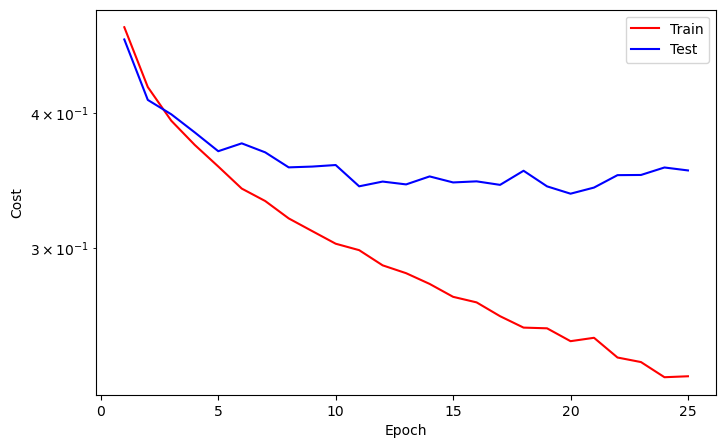

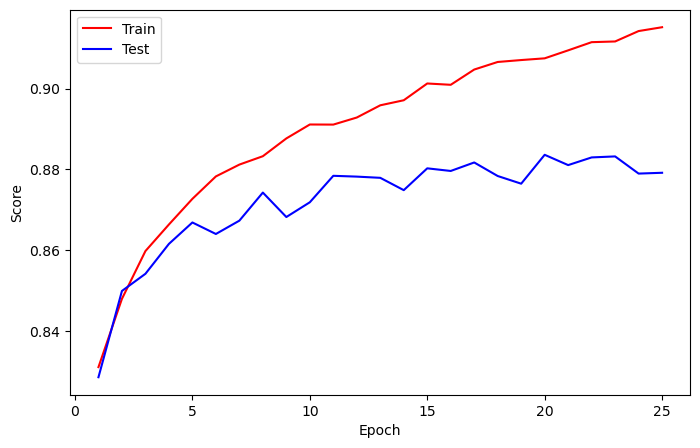

In [12]:
while True:
    train_cost,train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost,test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost,train_score,test_score)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

### Load Best Model

In [ ]:
# weights = torch.load('model/weights_best.pth',map_location='cpu')
# config = torch.load('model/configs.pth',map_location='cpu')

# model = FashionClassifier(config.input_size,config.n1,config.n2,config.output_size,config.dropout)
# model.load_state_dict(weights)
# model = model.to(device)

In [14]:
model

FashionClassifier(
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Sequential(
      (0): Linear(in_features=784, out_features=256, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
    )
    (2): Sequential(
      (0): Linear(in_features=256, out_features=64, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
    )
    (3): Sequential(
      (0): Linear(in_features=64, out_features=10, bias=True)
      (1): LogSoftmax(dim=1)
    )
  )
)

### Predict

In [22]:
label2cat = train_set.classes

In [27]:
feature , target = next(iter(testloader))
feature , target = feature.to(device),target.to(device)

In [28]:
with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)
[label2cat[pred] for pred in preds]

['Shirt',
 'Dress',
 'Dress',
 'Dress',
 'T-shirt or Top',
 'T-shirt or Top',
 'Pullover',
 'Bag',
 'Sneaker',
 'Sneaker',
 'Ankle boot',
 'Sneaker',
 'Bag',
 'Sneaker',
 'T-shirt or Top',
 'Sneaker',
 'Sneaker',
 'T-shirt or Top',
 'Pullover',
 'Shirt',
 'Shirt',
 'Pullover',
 'Sandal',
 'Bag',
 'Shirt',
 'Sneaker',
 'Trouser',
 'Ankle boot',
 'Sandal',
 'Shirt',
 'Ankle boot',
 'Shirt',
 'Shirt',
 'Shirt',
 'Shirt',
 'Shirt',
 'T-shirt or Top',
 'Sneaker',
 'Sandal',
 'Bag',
 'Bag',
 'Sandal',
 'Sneaker',
 'Pullover',
 'Sandal',
 'Bag',
 'Trouser',
 'Pullover',
 'Sneaker',
 'Trouser',
 'T-shirt or Top',
 'Trouser',
 'Sneaker',
 'Sneaker',
 'Shirt',
 'T-shirt or Top',
 'Shirt',
 'Shirt',
 'T-shirt or Top',
 'Dress',
 'T-shirt or Top',
 'Sneaker',
 'Sandal',
 'T-shirt or Top',
 'Sandal',
 'T-shirt or Top',
 'Sneaker',
 'Ankle boot',
 'Dress',
 'Sandal',
 'Trouser',
 'T-shirt or Top',
 'Pullover',
 'Sandal',
 'Trouser',
 'Coat',
 'Coat',
 'Shirt',
 'Coat',
 'Bag',
 'Sandal',
 'Pullover'

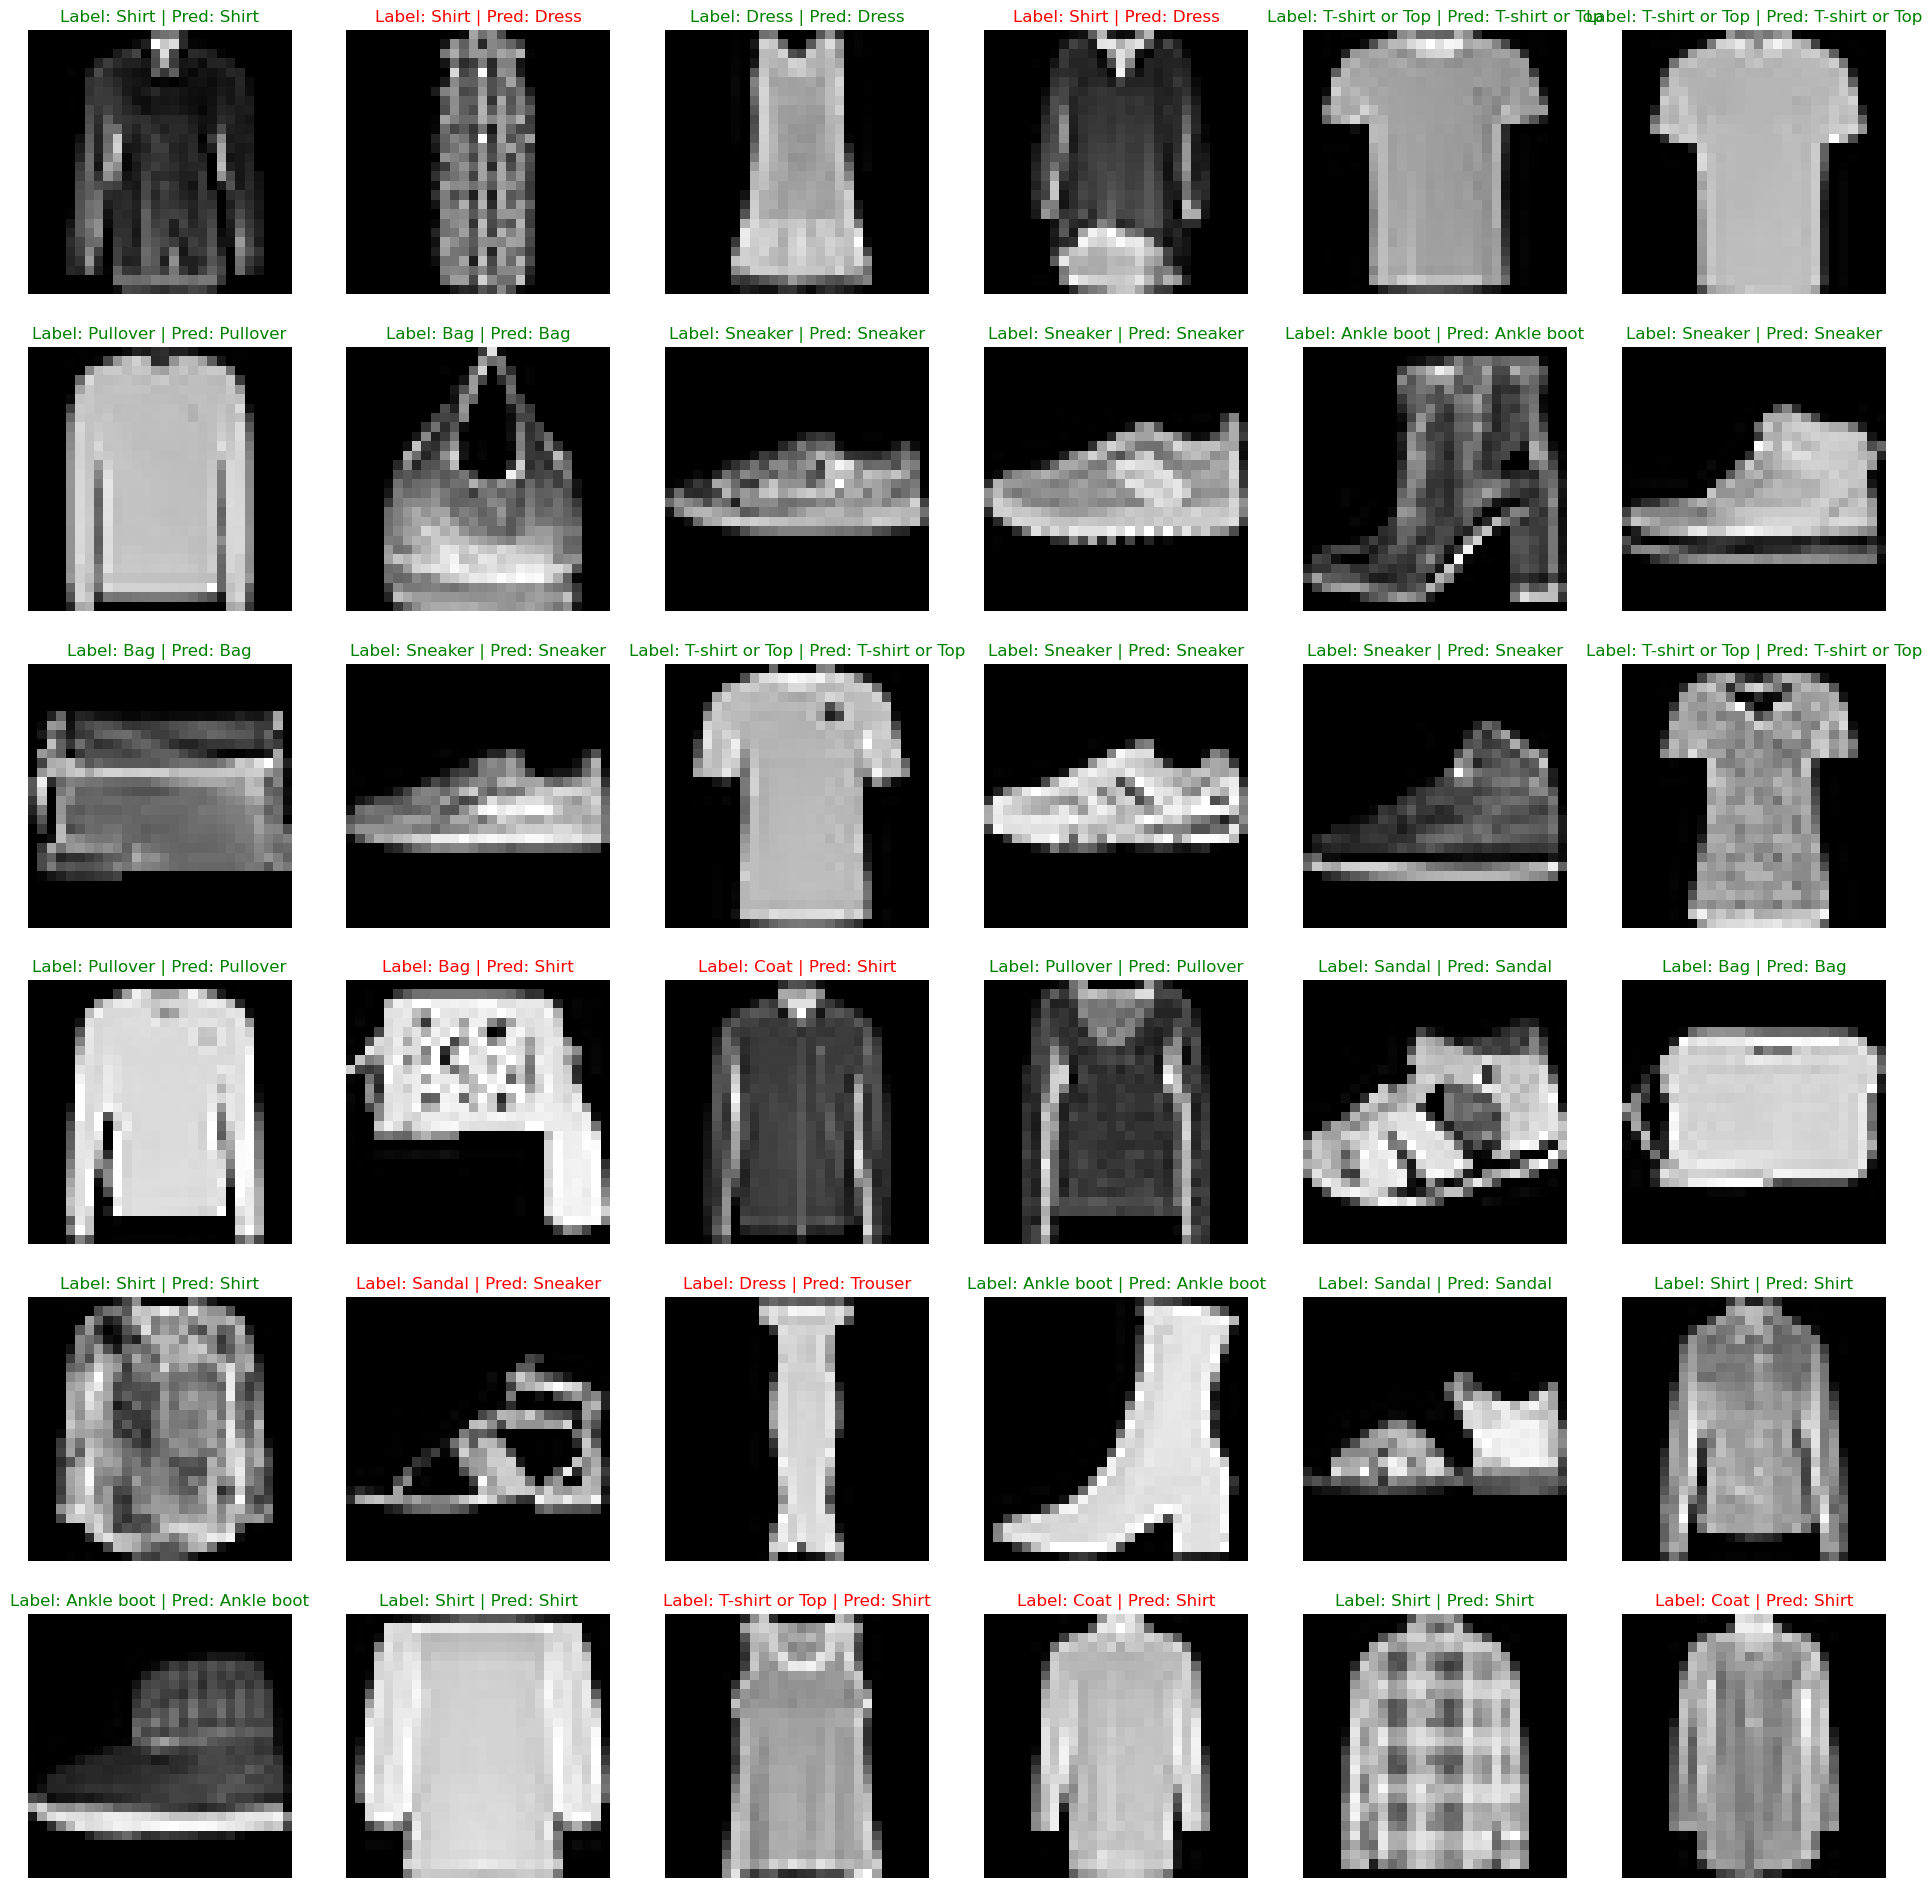

In [29]:
fig, axes = plt.subplots(6,6, figsize=(24,24))
for img, label, pred, ax in zip(feature,target, preds, axes.flatten()):
    ax.imshow(img.view(28,28).cpu(),cmap='gray')
    font = {'color':'r'} if label != pred else {'color':'g'}
    label, pred = label2cat[label.item()], label2cat[pred.item()]
    ax.set_title(f"Label: {label} | Pred: {pred}",fontdict=font);
    ax.axis('off');